# Catching zeros in the `gs-fg` files

In [ ]:
import os
import sys
os.chdir('/Users/ddeal/JWST-Treasure-Chest/')
sys.path.append('/Users/ddeal/JWST-FGS-Spelunker/JWST-FGS-spk-main/src/')

In [3]:
import spelunker

spk = spelunker.load(pid=1534, save=True) # Calling the load method without the pid initializes the class

Current working directory for spelunker: /Users/ddeal/JWST-Treasure-Chest/spelunker_outputs

INFO: Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340000825_cal.fits with expected size 9388800. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340002102_cal.fits with expected size 7827840. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001002_03101_00001_guider1/jw01534001002_gs-fg_2022340003651_cal.fits with expected size 8772480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001003_03101_00001_guider1/jw01534001003_gs-fg_2022340005224_cal.fits with expected size 8772480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001004_03101_00001_guider1/jw01534001004_gs-fg_2022340010755_cal.fits with expected size 8766720. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534002001_05101_000

In [17]:
spk.gauss2d_fit(ncpus=12)
spk.tester[-1]

2023-07-20 18:25:29,482	INFO worker.py:1636 -- Started a local Ray instance.
(ray_curve_fit pid=73186) /Users/ddeal/miniconda/envs/stenv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
(ray_curve_fit pid=73186)   warnings.warn('Covariance of the parameters could not be estimated',


RayTaskError(RuntimeError): [36mray::ray_curve_fit()[39m (pid=73186, ip=127.0.0.1)
  File "/Users/ddeal/JWST-FGS-Spelunker/JWST-FGS-spk-main/src/spelunker.py", line 587, in ray_curve_fit
    popt, pcov = opt.curve_fit(gaussian_2d, (xx, yy), datar, p0=initial_guess, maxfev = 500000)
  File "/Users/ddeal/miniconda/envs/stenv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py", line 839, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + errmsg)
RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 500000.

In [19]:
spk.tester[-1]

46158

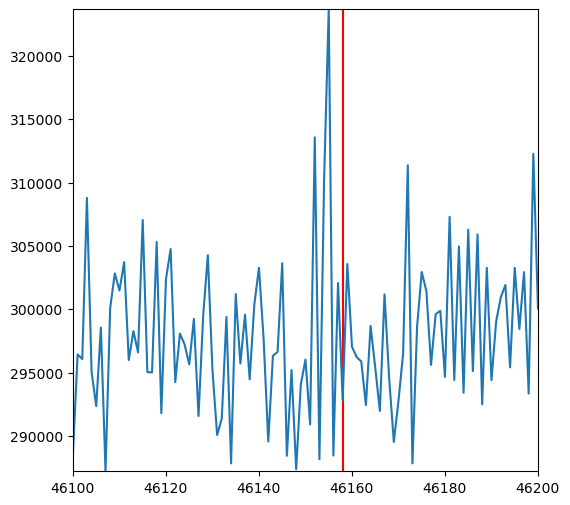

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(6,6))

ax.axvline(46158, color='red')
ax.set_xlim(46100,46200)
ax.set_ylim(np.min(spk.fg_flux[46100:46200]),np.max(spk.fg_flux[46100:46200]))
ax.plot(spk.fg_flux)
#spk.flux_spatial_timelapse_animation(start=46148, stop=46168,)


In [203]:
test_array = spk.fg_array #46158

In [204]:
import numpy as np
np.any(spk.fg_array == 0)

sky_section_1 = np.nanmedian(test_array[:,0,7])
sky_section_2 = np.nanmedian(test_array[:,7,0])
sky_section_3 = np.nanmedian(test_array[:,0,0])
sky_section_4 = np.nanmedian(test_array[:,7,7])

In [205]:
med_skypix = np.nanmean([sky_section_1, sky_section_2, sky_section_3, sky_section_4])

In [207]:
idx ,x,y = np.where(test_array <= 0)

In [208]:
pix_dead  = np.array([i for i in zip(idx,x,y)])

In [194]:
test_array[0][x,y]

254451.56

In [215]:
for i in zip(idx,x,y):
    test_array[i[0]][i[1],i[2]] = med_skypix

In [216]:
print(np.where(test_array <= 0))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


In [226]:
spk.gauss2d_fit(test_array/np.nanmedian(test_array), ncpus=6)

(ray_curve_fit pid=86318) /Users/ddeal/miniconda/envs/stenv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
(ray_curve_fit pid=86318)   warnings.warn('Covariance of the parameters could not be estimated',
2023-07-20 19:53:51,389	ERROR services.py:1207 -- Failed to start the dashboard 
2023-07-20 19:53:51,392	ERROR services.py:1232 -- Error should be written to 'dashboard.log' or 'dashboard.err'. We are printing the last 20 lines for you. See 'https://docs.ray.io/en/master/ray-observability/ray-logging.html#logging-directory-structure' to find where the log file is.
2023-07-20 19:53:51,393	ERROR services.py:1242 -- Couldn't read dashboard.log file. Error: [Errno 2] No such file or directory: '/tmp/ray/session_2023-07-20_19-53-29_427625_72354/logs/dashboard.log'. It means the dashboard is broken even before it initializes the logger (mostly dependency issues). Reading the dashboard.err file which contain

KeyboardInterrupt: 

In [ ]:
spk.tester

In [224]:
test_array/np.nanmedian(test_array)

array([[[ 0.27195263,  0.5220132 ,  0.9724633 , ...,  0.60747445,
          0.3728239 ,  0.18167248],
        [ 0.496711  ,  0.98729503,  2.602217  , ...,  1.4789113 ,
          0.5382386 ,  0.15419851],
        [ 0.6102166 ,  1.8624444 ,  6.3562202 , ...,  2.5019515 ,
          0.7269453 ,  0.26122722],
        ...,
        [ 0.27714935,  0.43819866,  0.8653815 , ...,  0.7327208 ,
          0.38392544,  0.14886667],
        [ 0.13074446,  0.36119777,  0.41374287, ...,  0.4566601 ,
          0.2573412 ,  0.12411561],
        [ 0.12400496,  0.21946904,  0.19427189, ...,  0.21494158,
          0.21185648,  0.09154755]],

       [[ 0.33939686,  0.5529626 ,  0.96523696, ...,  0.65646434,
          0.41143352,  0.29830173],
        [ 0.48194674,  1.0002432 ,  2.7135134 , ...,  1.3291917 ,
          0.5754027 ,  0.26402333],
        [ 0.66508013,  1.9937845 ,  6.922214  , ...,  2.2750385 ,
          0.85492855,  0.33462992],
        ...,
        [ 0.30585808,  0.48888186,  0.79465324, ...,  

In [144]:
1 - ((len(test_array) - len(pix_dead) ) /  len(test_array))

0.11018739198698757

In [150]:
test_array[18472][7,:]

array([211.97647 , 189.17885 , -12.842518,  64.031166,  86.310814,
       128.22496 , 380.72348 ,   0.      ], dtype=float32)

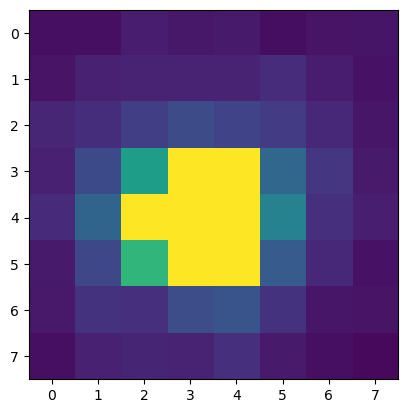

In [149]:
test_array = spk.fg_array #46158
plt.imshow(test_array[46158], vmin=-100, vmax=10000)